In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

In [2]:
titanic_data = pd.read_csv("train.csv")
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [36]:
X = titanic_data.drop(["PassengerId","Survived","Name","Ticket","Cabin"],axis=1)
y = titanic_data.Survived

In [37]:
X = pd.get_dummies(X)
X = X.fillna({"Age":X.Age.median()})
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [38]:
clf = tree.DecisionTreeClassifier(criterion="entropy")

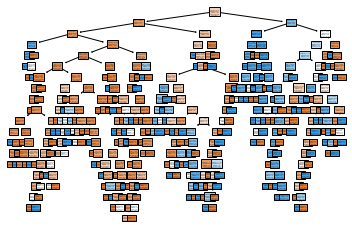

In [39]:
clf.fit(X,y)
tree.plot_tree(clf, feature_names=list(X),
               class_names=['Died', 'Survived'],
               filled=True);

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train , X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)
X_train.shape

(596, 10)

In [42]:
clf.fit(X_train,y_train)
clf.score(X_train,y_train)

0.9798657718120806

In [43]:
clf.score(X_test,y_test)

0.7661016949152543

In [44]:
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf.fit(X_train,y_train)

0.8238255033557047

In [45]:
clf.score(X_test,y_test)

0.8203389830508474

In [46]:
scores_data = pd.DataFrame()

In [47]:
max_depth_value = range(1,100)

In [49]:
for max_depth in max_depth_value:
    clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)
    clf.fit(X_train,y_train)
    train_score = clf.score(X_train,y_train)
    test_score = clf.score(X_test,y_test)

    temp_score_data = pd.DataFrame(
        {"max_depth": [max_depth],
         "train_score": [train_score],
         "test_score": [test_score]})
    scores_data = scores_data.append(temp_score_data)

In [50]:
scores_data.head()

,max_depth,train_score,test_score
0,1,0.781879,0.796610
0,2,0.805369,0.776271
0,3,0.823826,0.820339
0,4,0.833893,0.823729
0,5,0.840604,0.810169


In [54]:
scores_data_long = pd.melt(scores_data,
                                    id_vars=["max_depth"],
                                    value_vars=["train_score", "test_score"],
                                    var_name="set_type",
                                    value_name="score")

In [55]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


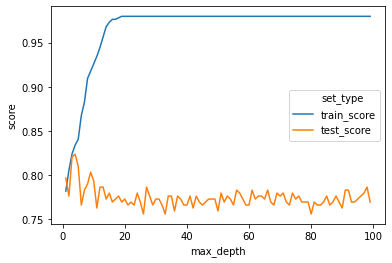

In [56]:
sns.lineplot(x = "max_depth", y = "score", hue = "set_type",data = scores_data_long)

